<a href="https://colab.research.google.com/github/nikiconst/nikiconst.github.io/blob/main/week10_11_Supervised_Unsupervised_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Model

Aim: Build a model that will be able to use house features (e.g. area, number of bedrooms etc.) to predict house prices.

In [1]:
# import libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# read csv as pandas dataframe
df_supervised = pd.read_csv('/content/Housing.csv')

In [5]:
# print top 5 lines of dataframe
df_supervised.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# filter dataframe to only include non-categorical columns to predict price
df_supervised = df_supervised[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
# standardise all columns, so that mean of each column is 0 and standard deviation of each column is 1
df_supervised = (df_supervised-df_supervised.mean())/df_supervised.std()

In [7]:
# split dataframe in 60% training, 20% validation and 20% testing data
# training and validation dataframe will be used to find the best polynomial degree to use
# testing dataset will be used to evaluate the model with the best polynomial degree

# split data in independent and target variable
X = df_supervised[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df_supervised[['price']]

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 8)

# use the same function above to get the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [8]:
# fit multiple polynomial degrees
degrees = [1, 2, 3, 6, 10, 20]

# set empty arrays for train and validation on different set of degrees to find the best model
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_val_pred = np.zeros((len(X_val), len(degrees)))

# loop on all polynomial degrees set above
for i, degree in enumerate(degrees):
    # make pipeline with different polynomial degrees to train linear regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # fit linear regression model
    model.fit(X_train, y_train)
    # predict on test and validation data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.squeeze(model.predict(X_train))
    y_val_pred[:, i] = np.squeeze(model.predict(X_val))

In [9]:
# loop on all polynomial degrees set above and compute mean squared error on training dataset and validation dataset
# the best polynomial degree to use is the one where mean squared error of training dataset and mean squared error of validation dataset is the closer
for i, degree in enumerate(degrees):
    train_mse = round(sklearn.metrics.mean_squared_error(y_train, y_train_pred[:, i]), 2)
    val_mse = round(sklearn.metrics.mean_squared_error(y_val, y_val_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, validation score={2}".format(degree, train_mse, val_mse))

Polynomial degree 1: train score=0.43, validation score=0.42
Polynomial degree 2: train score=0.39, validation score=0.43
Polynomial degree 3: train score=0.34, validation score=4.820798855121741e+23
Polynomial degree 6: train score=0.15, validation score=1.3627507498610913e+22
Polynomial degree 10: train score=0.08, validation score=4.442546851707941e+17
Polynomial degree 20: train score=0.11, validation score=1.635731361343799e+24


In [10]:
# best polynomial degree as shown above is 1
# train linear regression with 1 polynomial degree on training and validation dataset
# evaluate the model using a completely agnostic dataset (test dataset)

# append train and validation dataset
X_train_val = X_train.append(X_val)
y_train_val = y_train.append(y_val)
# make pipeline with 1 polynomial degree to train linear regression model
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
# fit linear regression model
model.fit(X_train_val, y_train_val)
# get predictions on test dataset
y_test_pred = model.predict(X_test)
# evaluate the model using mean squared error and r2
print(f'Mean squared error: {round(sklearn.metrics.mean_squared_error(y_test, y_test_pred), 2)}')
print(f'R2 score error: {round(sklearn.metrics.r2_score(y_test, y_test_pred), 2)}')

Mean squared error: 0.5
R2 score error: 0.54


Mean Squared Error: Mean Squared Error measures how close a regression line is to a set of data points; hence the lower the mean squared error the better. 

R2 Score: R2 Score is the proportion of the variation in the dependent variable that is predictable from the independent variable (i.e. how well the regression model explains observed data). R2 Score ranges between 0 and 1 and the closer it is to 1 the more the independent variable explains the dependent variable, hence the better.

Conclusion: It is difficult to understand if a model is good or not just by using Mean Squared Error because it is difficult to define what a low Mean Squared Error is. It is better to use Mean Squared Error to compare 2 models. However, R2 Score gives a more intuitive interpretation of how good the model is, since as mentioned above it ranges between 0 and 1 and the closer it is to 1 the better.

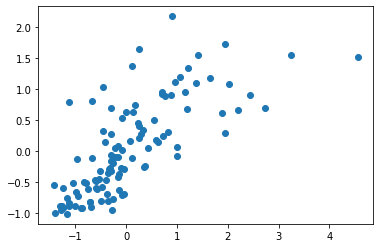

In [11]:
# plot actual vs predicted
# actual vs predicted should be as close as possible to a straight line
plt.scatter(y_test, y_test_pred)

Overall Conclusion: R2 Score of model is 0.54 which is descent but not the best. In the furture, this could be further improved by adding more features or more rows of data to build a more representable model.

# Unsupervised Model

Aim: Build a model that will split customers in different clusters according to different features (e.g. age, annual incode etc.)

In [33]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [22]:
# read csv as pandas dataframe
df_unsupervised = pd.read_csv('/content/Mall_Customers (1).csv')

In [23]:
# print top 5 lines of dataframe
df_unsupervised.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# filter dataframe to only include features that will be used to split customers in different clusters
df_unsupervised = df_unsupervised[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# standardise all columns, so that mean of each column is 0 and standard deviation of each column is 1
df_unsupervised = (df_unsupervised-df_unsupervised.mean())/df_unsupervised.std()

In [26]:
# inertia in KMeans measures how well a dataset was clustered by KMeans 
# inertia is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster
# a good model is one with low inertia and a low number of clusters (K)
# idea of the following is to use the elbow method to get the optimal K for KMeans
# as K increases, inertia will decrease but there is a point where it will decrease rapidly and from one point onwards it will have a less steep decrease
# optimal K occurs at the point of the steep decrease

# create list that will include inertia for each number of clusters used
clusters = []

# loop on different number of clusters (K in Kmeans)
for i in range(1, 11):
    # train KMeans model and fit the model
    km = KMeans(n_clusters=i).fit(df_unsupervised)
    # append inertial for each K in the list
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

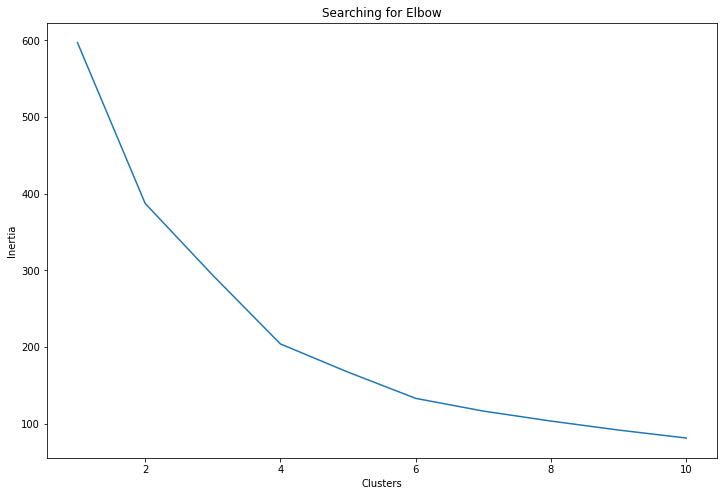

In [27]:
# plot inertia at each K to find optimal K
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Steep decrease occurs until cluster = 4 so K = 4 is the optimal K for KMeans

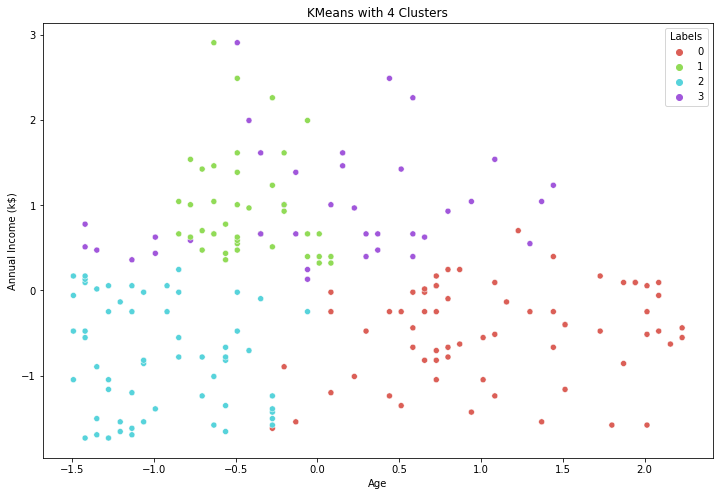

In [31]:
# train KMeans model using K=4 
km4 = KMeans(n_clusters=4).fit(df_unsupervised)

# get label of each customer
df_unsupervised['Labels'] = km4.labels_

# plot age against income graph showing the different clusters with different colours
plt.figure(figsize=(12, 8))
sns.scatterplot(x = df_unsupervised['Age'], y = df_unsupervised['Annual Income (k$)'], hue = df_unsupervised['Labels'],
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

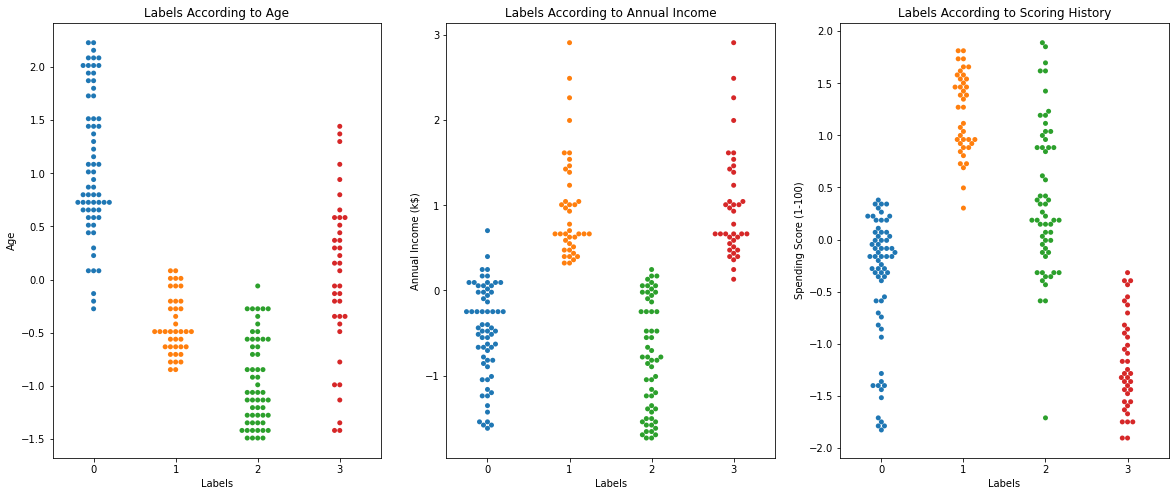

In [32]:
# use swarmplot to see how labels change according to each feature
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(131)
sns.swarmplot(x='Labels', y='Age', data=df_unsupervised, ax=ax)
ax.set_title('Labels According to Age')

ax = fig.add_subplot(132)
sns.swarmplot(x='Labels', y='Annual Income (k$)', data=df_unsupervised, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(133)
sns.swarmplot(x='Labels', y='Spending Score (1-100)', data=df_unsupervised, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

Overall Conclusion: As seen from the graphs, customers are split in different groups using a combination of features. For example, customers with mid age, mid income and high score are grouped together.